In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
dtype={'time': np.float64,
       'bti': bool,
       'bccd': bool,
       'n': np.int64,
       'mu': np.float64,
       'B_peak_log': np.float64,
       'B_eclipse_log': np.float64,
       'label': str,
       'runid': str}

In [3]:
df = pd.read_csv('../data/results_combined/merged_with_dr14/df_lc.csv', dtype=dtype, nrows=10000000)
print(f'memory mb={df.memory_usage(index=True).sum()/1024}')
df['time_0'] = df.groupby(['runid', 'label'])['time'].transform(lambda x: x - x.min())
grouped_max  = df.groupby(['runid', 'label'])['n'].transform('max')
grouped_mean = df.groupby(['runid', 'label'])['n'].transform('mean')

#df = df[grouped_max < 100]
#df = df[grouped_mean > 50]
#df = df.drop('time', axis=1)
df

memory mb=566406.37890625


,time,bti,bccd,n,mu,B_peak_log,B_eclipse_log,label,runid,time_0
0,7.692990e+08,True,True,0,0.000000,0.0,-inf,1,0911990501_0_5_0.2_2.0,0.0
1,7.692990e+08,True,False,0,0.061058,0.0,-1.200934,1,0911990501_0_5_0.2_2.0,5.0
2,7.692990e+08,True,False,0,0.055989,0.0,-1.239685,1,0911990501_0_5_0.2_2.0,10.0
3,7.692990e+08,True,False,0,0.057602,0.0,-1.226998,1,0911990501_0_5_0.2_2.0,15.0
4,7.692990e+08,True,False,0,0.049998,0.0,-1.290144,1,0911990501_0_5_0.2_2.0,20.0
...,...,...,...,...,...,...,...,...,...,...
9999995,7.371179e+08,False,False,0,0.010352,0.0,-1.982727,9,0882110401_0_5_0.2_12.0,44605.0
9999996,7.371179e+08,False,False,0,0.012542,0.0,-1.898913,9,0882110401_0_5_0.2_12.0,44610.0
9999997,7.371179e+08,False,False,0,0.005972,0.0,-2.222561,9,0882110401_0_5_0.2_12.0,44615.0
9999998,7.371179e+08,False,False,0,0.008361,0.0,-2.075914,9,0882110401_0_5_0.2_12.0,44620.0


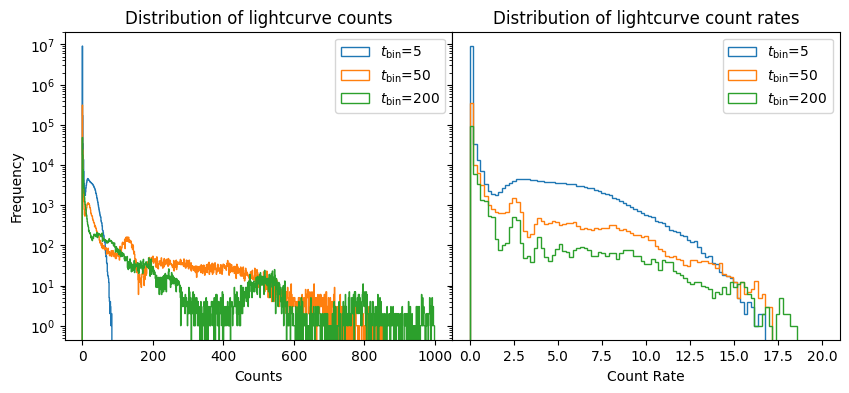

In [4]:
fig, ax = plt.subplots(1,2, figsize=(10,4), sharey=True)
t_bins = [5,50,200]
for i, t_bin in enumerate(t_bins):
    mask = df['runid'].str.contains(f'_{t_bin}_')
    sub = df[mask]

    hist_kwargs = {'label' : fr'$t_{{\mathrm{{bin}}}}$={t_bin}',
                   'lw' : 1.0,
                   'histtype': 'step'}
    ax[0].hist(sub['n'], bins=np.arange(0,1000,1), **hist_kwargs)
    ax[1].hist(sub['n']/t_bin, bins=np.linspace(0,20,100), **hist_kwargs)

ax[0].set_title('Distribution of lightcurve counts')
ax[1].set_title('Distribution of lightcurve count rates')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Counts')
ax[1].set_xlabel('Count Rate')

for a in ax:
    a.set_yscale('log')
    
    a.legend()
plt.subplots_adjust(wspace=0)
plt.show()

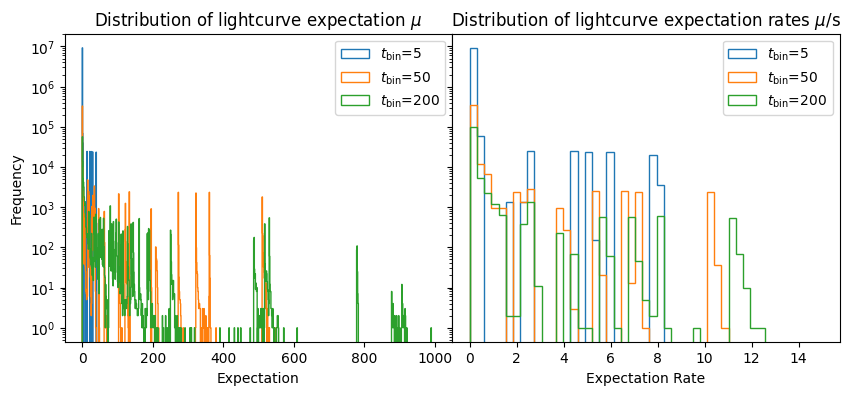

In [5]:
fig, ax = plt.subplots(1,2, figsize=(10,4), sharey=True)
t_bins = [5,50,200]
for i, t_bin in enumerate(t_bins):
    mask = df['runid'].str.contains(f'_{t_bin}_')
    sub = df[mask]

    hist_kwargs = {'label' : fr'$t_{{\mathrm{{bin}}}}$={t_bin}',
                   'lw' : 1.0,
                   'histtype': 'step'}
    ax[0].hist(sub['mu'], bins=np.arange(0,1000,1), **hist_kwargs)
    ax[1].hist(sub['mu']/t_bin, bins=np.linspace(0,15,50), **hist_kwargs)

ax[0].set_title(r'Distribution of lightcurve expectation $\mu$')
ax[1].set_title(r'Distribution of lightcurve expectation rates $\mu$/s')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Expectation')
ax[1].set_xlabel('Expectation Rate')

for a in ax:
    a.set_yscale('log')
    
    a.legend()
plt.subplots_adjust(wspace=0)
plt.show()

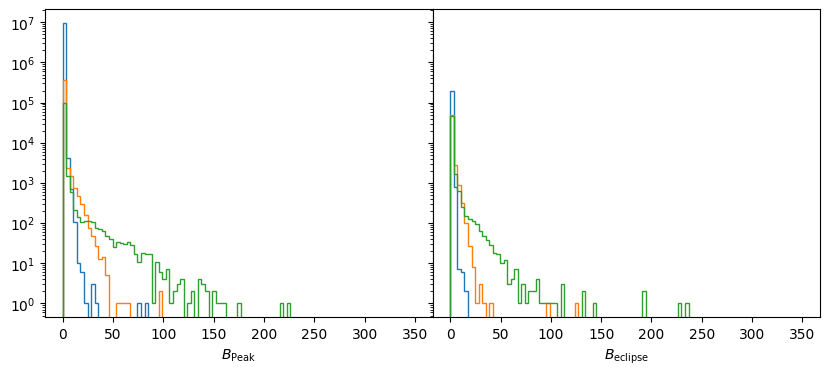

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,4), sharey=True)
t_bins = [5,50,200]
for i, t_bin in enumerate(t_bins):
    mask = df['runid'].str.contains(f'_{t_bin}_')
    sub = df[mask]

    hist_kwargs = {'label' : fr'$t_{{\mathrm{{bin}}}}$={t_bin}',
                   'lw' : 1.0,
                   'histtype': 'step'}
    ax[0].hist(sub['B_peak_log'], bins=np.linspace(0,350,100), histtype='step')
    ax[1].hist(sub['B_eclipse_log'], bins=np.linspace(0,350,100), histtype='step')
    
for a in ax:
    a.set_yscale('log')

ax[0].set_xlabel(r'$B_{\mathrm{Peak}}$')
ax[1].set_xlabel(r'$B_{\mathrm{eclipse}}$')
plt.subplots_adjust(wspace=0)
plt.show()

(0.0, 100.0)

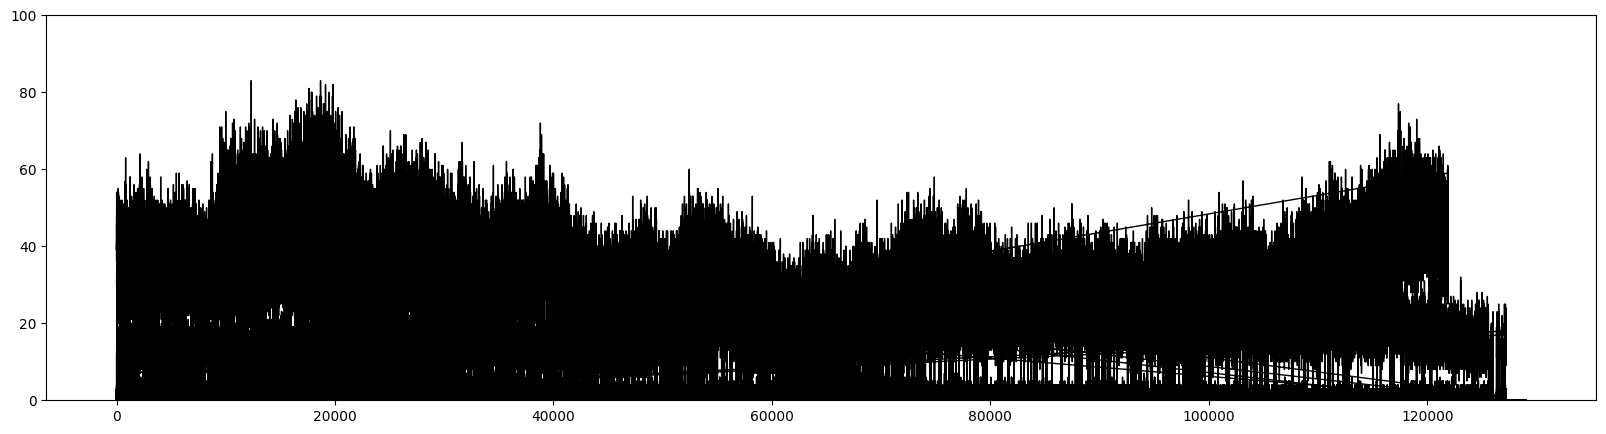

In [7]:
plt.figure(figsize=(20,5))
sub = df[df['runid'].str.contains('_5_')]
gb = sub.groupby(['runid', 'label'])
transform = gb['n'].transform('max')
sub = sub[transform < 100]

plt.plot(sub['time_0'], sub['n'], color='black', lw=1.0)
plt.ylim(0,100)

In [8]:
dtype={'time': np.float64,
       'bti': bool,
       'bccd': bool,
       'n': np.int64,
       'mu': np.float64,
       'B_peak_log': np.float64,
       'B_eclipse_log': np.float64,
       'label': str,
       'runid': str}

In [9]:
ns = np.array([])
for df in pd.read_csv('../data/results_combined/27_5_24_dr14/df_lc.csv', dtype=dtype, chunksize=1e7):
    ns = np.append(ns, df['n'])
    print(len(ns))

10000000
20000000
22208300


In [11]:
ns  = np.array([])
mus = np.array([])
for df in pd.read_csv('../data/results_combined/merged_with_dr14/df_lc.csv', dtype=dtype, chunksize=1e7):
    for tbin in ['_5_', '_50_', '_200_']:
        mask = df['runid'].str.contains(tbin)
        sub = df[mask]
        v = int(tbin.split('_')[1])
    
        ns  = np.append(ns, sub['n']/v)
        mus = np.append(mus, sub['mu']/v)
    print(len(ns))


10000000
20000000
30000000
40000000
50000000
60000000
70000000
80000000
90000000
100000000
110000000
120000000
130000000
140000000
150000000
160000000
170000000
180000000
190000000
200000000
210000000
220000000
230000000
240000000
250000000
260000000
270000000
280000000
290000000
294838877


In [18]:
from exod.utils.plotting import set_latex_font
set_latex_font()

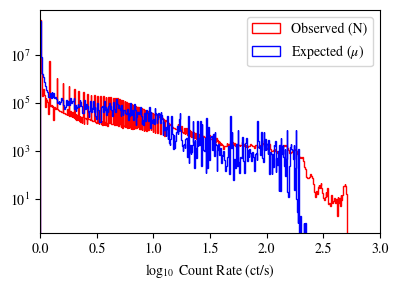

In [23]:
plt.figure(figsize=(4,3))
plt.hist(np.log10(ns+1), bins=np.linspace(0,3,500), histtype='step', label=r'Observed (N)', color='red', lw=1.0)
plt.hist(np.log10(mus+1), bins=np.linspace(0,3,500), histtype='step', label=r'Expected ($\mu$)', color='blue', lw=1.0)
plt.xlabel(r'$\log_{10}$ Count Rate (ct/s)')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.xlim(0,3.0)
plt.savefig('../data/plots/N_mu_dist_all_lc.png')
plt.savefig('../data/plots/N_mu_dist_all_lc.pdf')
plt.show()

In [10]:
import pandas as pd
df = pd.read_csv('../data/results_combined/merged_with_dr14/df_lc.csv', nrows=40000)

In [13]:
for (label, runid), df in df.groupby(['label', 'runid']):
    print(label, runid)
    print(df)

1 0911990501_0_5_0.2_2.0
               time    bti   bccd  n        mu  B_peak_log  B_eclipse_log  \
0      7.692990e+08   True   True  0  0.000000         0.0           -inf   
1      7.692990e+08   True  False  0  0.061058         0.0      -1.200934   
2      7.692990e+08   True  False  0  0.055989         0.0      -1.239685   
3      7.692990e+08   True  False  0  0.057602         0.0      -1.226998   
4      7.692990e+08   True  False  0  0.049998         0.0      -1.290144   
...             ...    ...    ... ..       ...         ...            ...   
24690  7.694224e+08   True   True  0  0.000000         0.0           -inf   
24691  7.694224e+08   True   True  0  0.000000         0.0           -inf   
24692  7.694224e+08   True   True  0  0.000000         0.0           -inf   
24693  7.694224e+08   True   True  0  0.000000         0.0           -inf   
24694  7.694225e+08  False   True  0  0.000000         0.0           -inf   

       label                   runid  
0          

10000000.0
20000000.0
30000000.0
40000000.0
50000000.0
60000000.0
70000000.0
80000000.0
90000000.0
100000000.0
110000000.0
120000000.0
130000000.0
140000000.0
150000000.0
160000000.0
170000000.0
180000000.0
190000000.0
200000000.0
210000000.0
220000000.0
230000000.0
240000000.0
250000000.0
260000000.0
270000000.0
280000000.0
290000000.0
300000000.0
                                 start_index    end_index
(0, 0882110401_0_5_0.2_12.0)       9967375.0    9991073.0
(0, 0882110401_0_5_0.2_2.0)        9659288.0    9682986.0
(0, 0882110401_0_5_2.0_12.0)       9919977.0    9943675.0
(0, 0882110501_0_200_0.2_12.0)     9633689.0    9634068.0
(0, 0882110501_0_200_0.2_2.0)      9631789.0    9632168.0
...                                      ...          ...
(9, 0910191101_0_5_0.2_2.0)      582073931.0  582094010.0
(9, 0914792901_0_5_0.2_12.0)     583871788.0  583894552.0
(10, 0903710201_0_200_0.2_12.0)  580268098.0  580268257.0
(10, 0910190701_0_5_0.2_2.0)     581852223.0  581873394.0
(11, 090371

In [68]:
df_start_end

,start_index,end_index,increment
"(1, 0911990501_0_5_0.2_2.0)",0.0,24694.0,24694.0
"(0, 0911990501_0_5_0.2_2.0)",24695.0,49389.0,24694.0
"(2, 0911990501_0_5_0.2_2.0)",49390.0,74084.0,24694.0
"(3, 0911990501_0_5_0.2_2.0)",74085.0,98779.0,24694.0
"(5, 0911990501_0_5_0.2_2.0)",98780.0,123474.0,24694.0
...,...,...,...
"(1, 0932391001_0_200_0.2_12.0)",584837772.0,584837992.0,220.0
"(0, 0932391001_0_200_0.2_12.0)",584837993.0,584838213.0,220.0
"(2, 0932391001_0_200_0.2_12.0)",584838214.0,584838434.0,220.0
"(3, 0932391001_0_200_0.2_12.0)",584838435.0,584838655.0,220.0


In [ ]:
import pandas as pd
pd.read_hdf('../data/results_combined/merged_with_dr14/df_lc.h5', start=0, stop=100)

,start_index,end_index,increment
"(1, '0911990501_0_5_0.2_2.0')",0.0,24694.0,24694.0
"(0, '0911990501_0_5_0.2_2.0')",24695.0,49389.0,24694.0
"(2, '0911990501_0_5_0.2_2.0')",49390.0,74084.0,24694.0
"(3, '0911990501_0_5_0.2_2.0')",74085.0,98779.0,24694.0
"(5, '0911990501_0_5_0.2_2.0')",98780.0,123474.0,24694.0
...,...,...,...
"(1, '0932391001_0_200_0.2_12.0')",584837772.0,584837992.0,220.0
"(0, '0932391001_0_200_0.2_12.0')",584837993.0,584838213.0,220.0
"(2, '0932391001_0_200_0.2_12.0')",584838214.0,584838434.0,220.0
"(3, '0932391001_0_200_0.2_12.0')",584838435.0,584838655.0,220.0


In [ ]:
import pandas as pd

def find_unique_combinations(file_path, chunk_size=1e7):
    """Find the start and end_indexs of the unique runid, and label combination for the lightcurve file."""
    unique_combinations = {}
    current_index = 0

    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        groupby = chunk.groupby(['label', 'runid'])
        for (label, runid), df in groupby:
            start_index = int(df.index[0] + current_index)
            end_index   = int(df.index[-1] + current_index)
            if (label, runid) in unique_combinations:
                unique_combinations[(label, runid)] = (unique_combinations[(label, runid)][0], end_index)
            else:
                unique_combinations[(label, runid)] = (start_index, end_index)
        current_index += chunk_size
        
    df_start_end = pd.DataFrame.from_dict(unique_combinations, orient='index', columns=['start_index', 'end_index'])
    df_start_end = df_start_end.sort_values('start_index')
    df_start_end['increment'] = df_start_end['end_index'] - df_start_end['start_index']
    return df_start_end

# Use the function to process the file
df_start_end = find_unique_combinations('../data/results_combined/merged_with_dr14/df_lc.csv')
print(df_start_end)


In [12]:
df = pd.read_hdf('../data/results_combined/merged_with_dr14/df_lc.h5', start=96336809, stop=96340068)

In [11]:
df

,time,bti,bccd,n,mu,B_peak_log,B_eclipse_log,label,runid
96336809,6.153016e+08,False,False,0,0.002344,0.0,-2.629528,2,0801510101_0_5_0.2_2.0
96336810,6.153016e+08,False,False,0,0.001122,0.0,-2.949889,2,0801510101_0_5_0.2_2.0
96336811,6.153016e+08,False,False,0,0.002038,0.0,-2.690259,2,0801510101_0_5_0.2_2.0
96336812,6.153016e+08,False,False,0,0.001733,0.0,-2.760862,2,0801510101_0_5_0.2_2.0
96336813,6.153016e+08,False,False,0,0.001733,0.0,-2.760862,2,0801510101_0_5_0.2_2.0
...,...,...,...,...,...,...,...,...,...
96340063,6.153178e+08,False,False,0,0.001427,0.0,-2.845186,2,0801510101_0_5_0.2_2.0
96340064,6.153178e+08,False,False,0,0.002038,0.0,-2.690259,2,0801510101_0_5_0.2_2.0
96340065,6.153178e+08,False,False,0,0.001427,0.0,-2.845186,2,0801510101_0_5_0.2_2.0
96340066,6.153178e+08,False,False,0,0.001733,0.0,-2.760862,2,0801510101_0_5_0.2_2.0
